In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize


In [2]:
df= pd.read_excel("Creatives_New.xlsx", sheet_name='Walmart ')
df.head(4)

,Converge,Campaign Name,Media Buy Name,Creative Name,Creative Image,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,IO Start Date,IO End Date,Impressions,Clicks,Color,CTA,Product Shot / Product Portfolio,Lifestyle Imagery,Heavy Copy,Savings Messaging
0,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_DO_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,https://tpc.googlesyndication.com/pageadimg/im...,Demographic,160x600,NaN,NaN,2018-01-01,2018-02-28,202255.0,34.0,White,Shop Now,Product Portfolio,Yes,No,No
1,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_ORGANIC_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,https://tpc.googlesyndication.com/pageadimg/im...,Behavioral,160x600,NaN,NaN,2018-01-01,2018-02-28,176435.0,21.0,White,Shop Now,Product Portfolio,Yes,No,No
2,01_ABB_J9273,01_ABB_J9273_AbbottMommy,CT_BABY_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,https://tpc.googlesyndication.com/pageadimg/im...,Contextual,160x600,NaN,NaN,2018-01-01,2018-02-28,86194.0,45.0,White,Shop Now,Product Portfolio,Yes,No,No
3,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_BRAND_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,https://tpc.googlesyndication.com/pageadimg/im...,Behavioral,160x600,NaN,NaN,2018-01-01,2018-02-28,60277.0,9.0,White,Shop Now,Product Portfolio,Yes,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12658 entries, 0 to 12657
Data columns (total 19 columns):
Converge                            12658 non-null object
Campaign Name                       12658 non-null object
Media Buy Name                      12658 non-null object
Creative Name                       12658 non-null object
Creative Image                      12571 non-null object
Targeting Type                      12658 non-null object
Creative Size                       12658 non-null object
L1 Vertical                         12112 non-null object
L2 Vertical                         12112 non-null object
IO Start Date                       12650 non-null datetime64[ns]
IO End Date                         12650 non-null datetime64[ns]
Impressions                         12650 non-null float64
Clicks                              12650 non-null float64
Color                               12658 non-null object
CTA                                 11848 non-null object
Pro

In [4]:
df=df.drop(['Converge', 'Campaign Name', 'Creative Image','Media Buy Name','Creative Name','IO Start Date','IO End Date','Color','CTA','Product Shot / Product Portfolio','Lifestyle Imagery','Heavy Copy','Savings Messaging'], axis=1)
df.head()

,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,Impressions,Clicks
0,Demographic,160x600,NaN,NaN,202255.0,34.0
1,Behavioral,160x600,NaN,NaN,176435.0,21.0
2,Contextual,160x600,NaN,NaN,86194.0,45.0
3,Behavioral,160x600,NaN,NaN,60277.0,9.0
4,Behavioral,160x600,Baby & Toddlers,Infant Care & Consumables,156743.0,19.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12658 entries, 0 to 12657
Data columns (total 6 columns):
Targeting Type    12658 non-null object
Creative Size     12658 non-null object
L1 Vertical       12112 non-null object
L2 Vertical       12112 non-null object
Impressions       12650 non-null float64
Clicks            12650 non-null float64
dtypes: float64(2), object(4)
memory usage: 593.5+ KB


In [8]:
dummy=pd.get_dummies(df['Targeting Type'])
dummy.head()

,Behavioral,Contextual,Demographic,Geographic,Keyword/Search,Lockout,RunOfSite
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [9]:
df=pd.concat([df,dummy],axis=1)
df.head()

,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,Impressions,Clicks,Behavioral,Contextual,Demographic,Geographic,Keyword/Search,Lockout,RunOfSite
0,Demographic,160x600,NaN,NaN,202255.0,34.0,0,0,1,0,0,0,0
1,Behavioral,160x600,NaN,NaN,176435.0,21.0,1,0,0,0,0,0,0
2,Contextual,160x600,NaN,NaN,86194.0,45.0,0,1,0,0,0,0,0
3,Behavioral,160x600,NaN,NaN,60277.0,9.0,1,0,0,0,0,0,0
4,Behavioral,160x600,Baby & Toddlers,Infant Care & Consumables,156743.0,19.0,1,0,0,0,0,0,0


In [10]:
df['L1 Vertical']= df['L1 Vertical'].fillna('Others')
df['L2 Vertical']= df['L2 Vertical'].fillna('Others')

In [11]:
dummy=pd.get_dummies(df['L1 Vertical'])
dummy.head()

,Apparel & Accessories,Automotive,Baby & Toddlers,Beauty & Personal Care,Consumer Electronics,Crafts & Party Supplies,"Entertainment: Movies, Music & Books",Food & Beverage,Health & Wellness,"Home: Garden, Furniture & Appliances",Household & Pet,Non-endemic,Office,Others,Sporting Goods,Toys & Games
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df=pd.concat([df,dummy],axis=1)
df.head()

,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,Impressions,Clicks,Behavioral,Contextual,Demographic,Geographic,...,"Entertainment: Movies, Music & Books",Food & Beverage,Health & Wellness,"Home: Garden, Furniture & Appliances",Household & Pet,Non-endemic,Office,Others,Sporting Goods,Toys & Games
0,Demographic,160x600,Others,Others,202255.0,34.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,Behavioral,160x600,Others,Others,176435.0,21.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Contextual,160x600,Others,Others,86194.0,45.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Behavioral,160x600,Others,Others,60277.0,9.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Behavioral,160x600,Baby & Toddlers,Infant Care & Consumables,156743.0,19.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dummy=pd.get_dummies(df['L2 Vertical'])
df=pd.concat([df,dummy],axis=1)
df.head()

,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,Impressions,Clicks,Behavioral,Contextual,Demographic,Geographic,...,Snacks,Software,Sports & Outdoor Recreation,TVs,Tires,Toys,Vehicles,Video Games,Weight Management,Wireless
0,Demographic,160x600,Others,Others,202255.0,34.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Behavioral,160x600,Others,Others,176435.0,21.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Contextual,160x600,Others,Others,86194.0,45.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Behavioral,160x600,Others,Others,60277.0,9.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Behavioral,160x600,Baby & Toddlers,Infant Care & Consumables,156743.0,19.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dummy=pd.get_dummies(df['Creative Size'])
df=pd.concat([df,dummy],axis=1)
df.head()

,Creative Size,Impressions,Clicks,Behavioral,Contextual,Demographic,Geographic,Keyword/Search,Lockout,RunOfSite,...,Tires,Toys,Vehicles,Video Games,Weight Management,Wireless,CTR,160x600,728x90,Custom rendering
0,160x600,202255.0,34.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.016810,1,0,0
1,160x600,176435.0,21.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.011902,1,0,0
2,160x600,86194.0,45.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.052208,1,0,0
3,160x600,60277.0,9.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.014931,1,0,0
4,160x600,156743.0,19.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.012122,1,0,0


In [15]:
df=df.drop(['L1 Vertical','L2 Vertical','Targeting Type'], axis=1)
df.head()

,Creative Size,Impressions,Clicks,Behavioral,Contextual,Demographic,Geographic,Keyword/Search,Lockout,RunOfSite,...,Snacks,Software,Sports & Outdoor Recreation,TVs,Tires,Toys,Vehicles,Video Games,Weight Management,Wireless
0,160x600,202255.0,34.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,160x600,176435.0,21.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,160x600,86194.0,45.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,160x600,60277.0,9.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,160x600,156743.0,19.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df=df.drop(['Creative Size'], axis=1)
df.head()

,Impressions,Clicks,Behavioral,Contextual,Demographic,Geographic,Keyword/Search,Lockout,RunOfSite,Apparel & Accessories,...,Tires,Toys,Vehicles,Video Games,Weight Management,Wireless,CTR,160x600,728x90,Custom rendering
0,202255.0,34.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.016810,1,0,0
1,176435.0,21.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.011902,1,0,0
2,86194.0,45.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.052208,1,0,0
3,60277.0,9.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.014931,1,0,0
4,156743.0,19.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.012122,1,0,0


In [27]:
df.dtypes

Impressions         float64
Clicks              float64
Behavioral            uint8
Contextual            uint8
Demographic           uint8
                     ...   
Wireless              uint8
CTR                 float64
160x600               uint8
728x90                uint8
Custom rendering      uint8
Length: 143, dtype: object

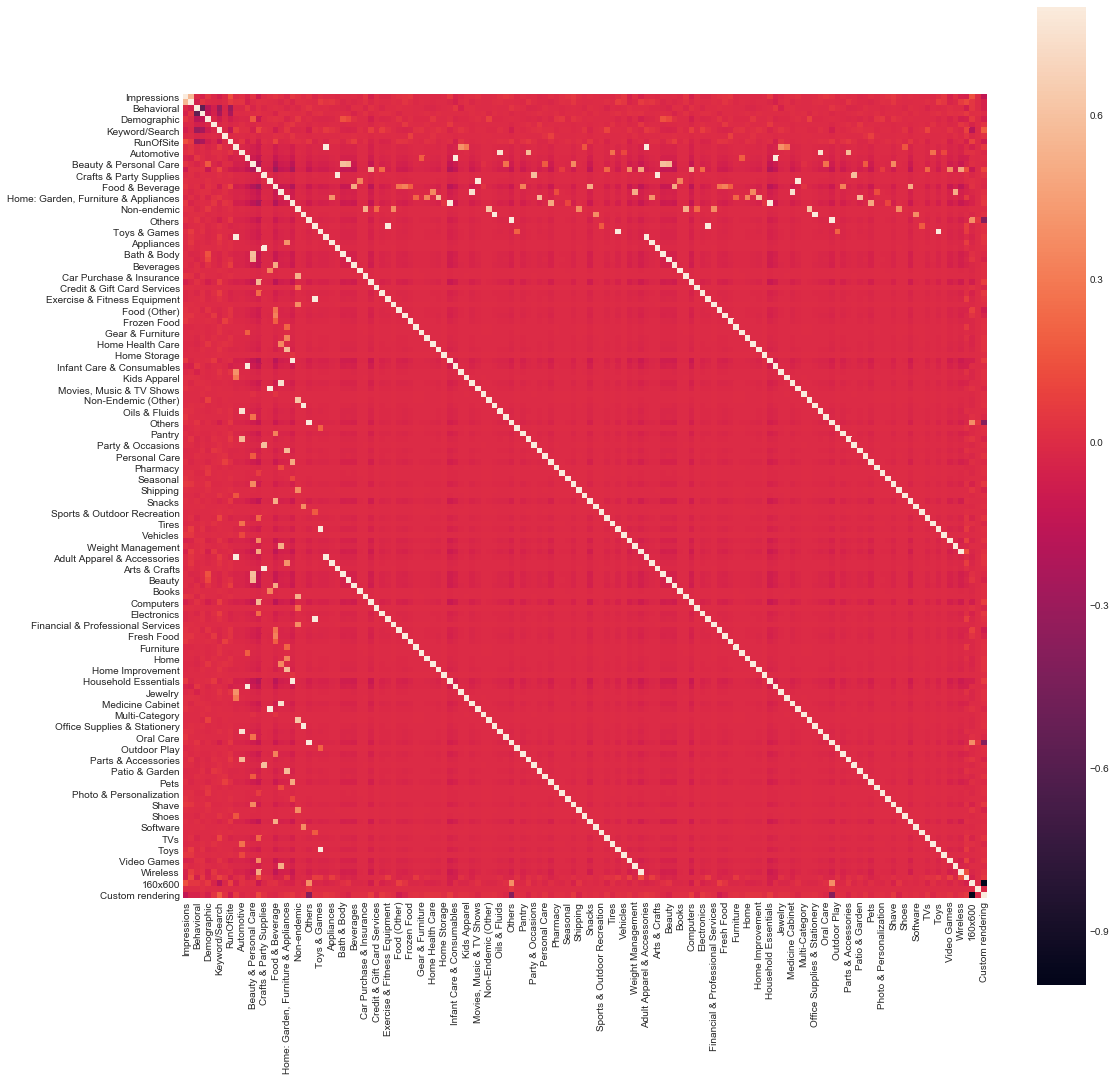

In [28]:
correlation_matrix = df.corr()
figures, axes = plt.subplots(1,1, figsize=(18,18))
sns.heatmap(correlation_matrix, vmax=0.8, square=True)

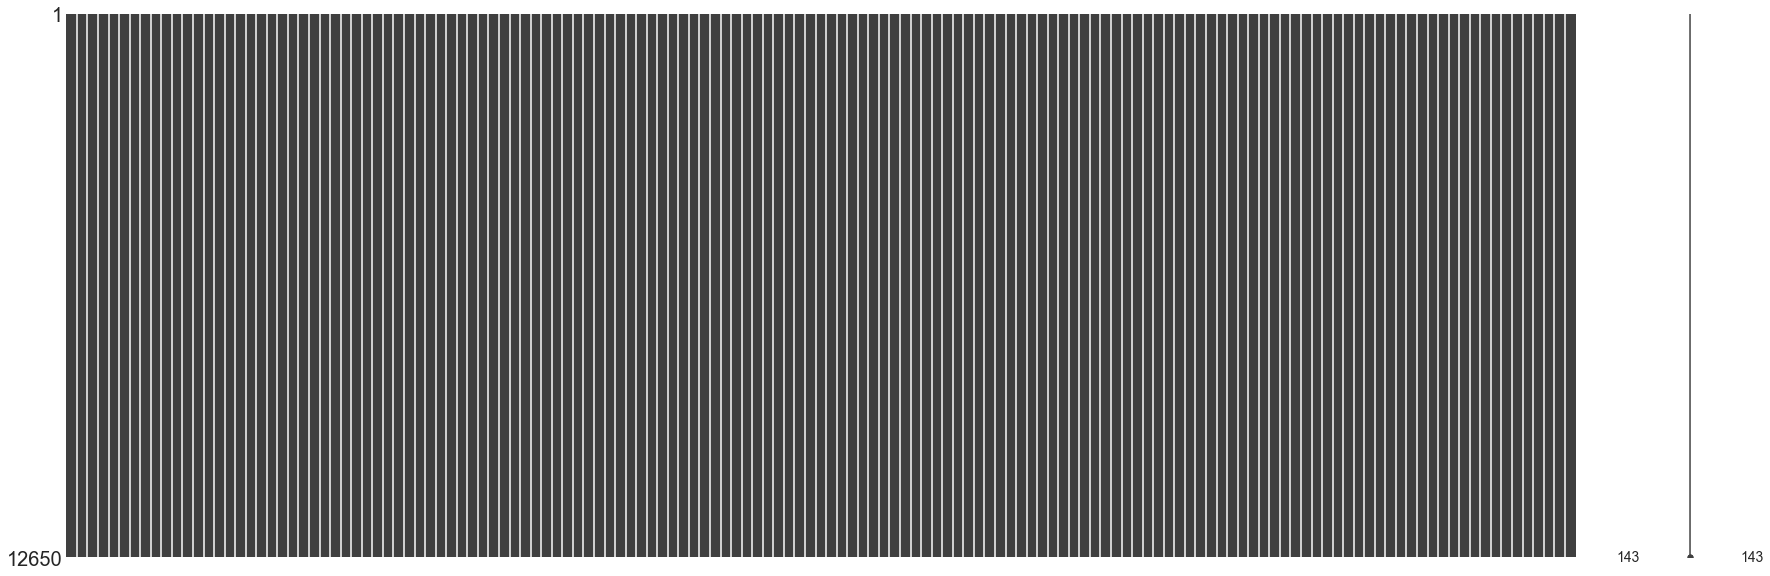

In [29]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

In [30]:
num_missing_data = df.isnull().sum()
num_missing_data

Impressions         0
Clicks              0
Behavioral          0
Contextual          0
Demographic         0
                   ..
Wireless            0
CTR                 0
160x600             0
728x90              0
Custom rendering    0
Length: 143, dtype: int64

In [31]:
df.dropna(inplace=True)
df

,Impressions,Clicks,Behavioral,Contextual,Demographic,Geographic,Keyword/Search,Lockout,RunOfSite,Apparel & Accessories,...,Tires,Toys,Vehicles,Video Games,Weight Management,Wireless,CTR,160x600,728x90,Custom rendering
0,202255.0,34.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.016810,1,0,0
1,176435.0,21.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.011902,1,0,0
2,86194.0,45.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.052208,1,0,0
3,60277.0,9.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.014931,1,0,0
4,156743.0,19.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.012122,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12653,57635.0,43.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.074607,0,0,1
12654,11246.0,4.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.035568,0,0,1
12655,42852.0,24.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.056007,0,0,1
12656,18479.0,3.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.016235,0,0,1


In [32]:
num_missing_data = df.isnull().sum()
num_missing_data 

Impressions         0
Clicks              0
Behavioral          0
Contextual          0
Demographic         0
                   ..
Wireless            0
CTR                 0
160x600             0
728x90              0
Custom rendering    0
Length: 143, dtype: int64

In [33]:
df['CTR'] = (df['Clicks']/df['Impressions'])*100
df.head()

,Impressions,Clicks,Behavioral,Contextual,Demographic,Geographic,Keyword/Search,Lockout,RunOfSite,Apparel & Accessories,...,Tires,Toys,Vehicles,Video Games,Weight Management,Wireless,CTR,160x600,728x90,Custom rendering
0,202255.0,34.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.016810,1,0,0
1,176435.0,21.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.011902,1,0,0
2,86194.0,45.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.052208,1,0,0
3,60277.0,9.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.014931,1,0,0
4,156743.0,19.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.012122,1,0,0


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

melb_target = df['CTR']
melb_predictors = df.drop(['CTR'], axis=1)


In [36]:
melb_target.shape

(12650,)

In [37]:
melb_predictors.shape

(12650, 142)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,melb_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=1)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (8855, 143)
X_test : (3795, 143)
y_train : (8855,)
y_test : (3795,)


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 5.1898620113636935e-14
RMSE on Test set : 3.337847188372412e-12


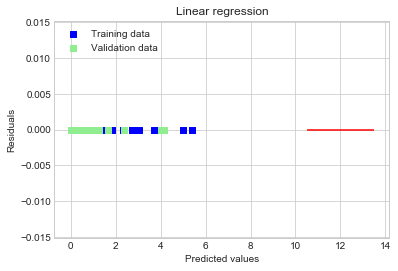

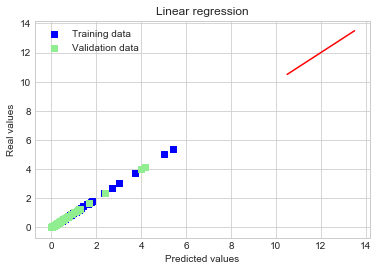

In [41]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05
Lasso RMSE on Training set : 0.000412976234287199
Lasso RMSE on Test set : 0.00042832300395101604


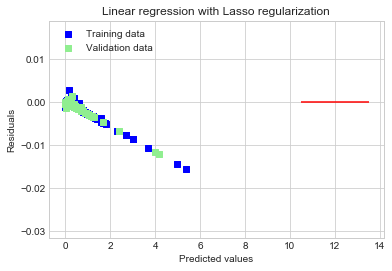

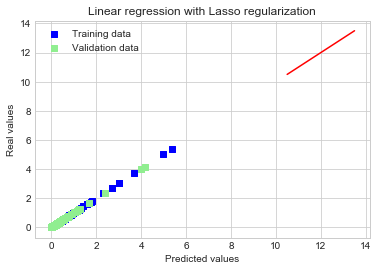

Lasso picked 3 features and eliminated the other 140 features


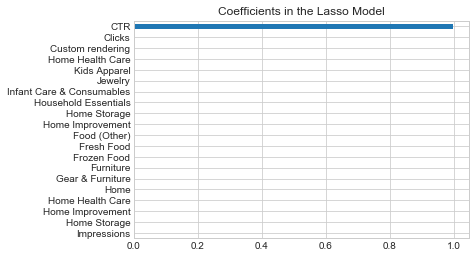

In [42]:
#  Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)
print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()